<a href="https://colab.research.google.com/github/slavyolov/Algorithms/blob/main/NAB_datasets_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAB dataset**
- https://www.kaggle.com/code/anisamand/nab-dsataset-visualisation-with-correct-labels/data
 - Welcome. This repository contains the data and scripts which comprise the Numenta Anomaly Benchmark (NAB) v1.1. NAB is a novel benchmark for evaluating algorithms for anomaly detection in streaming, real-time applications. It is composed of over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications.
- repo - https://github.com/numenta/NAB
- data - https://github.com/numenta/NAB/tree/master/data
- labels - https://github.com/numenta/NAB/tree/master/labels

In [2]:
!git clone https://github.com/numenta/NAB.git

Cloning into 'NAB'...
remote: Enumerating objects: 7029, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 7029 (delta 48), reused 38 (delta 15), pack-reused 6915
Receiving objects: 100% (7029/7029), 86.75 MiB | 23.04 MiB/s, done.
Resolving deltas: 100% (4922/4922), done.
Checking out files: 100% (1186/1186), done.


In [3]:
!ls

NAB  sample_data


In [9]:
!ls -la NAB/data

total 40
drwxr-xr-x  9 root root 4096 Aug 23 12:35 .
drwxr-xr-x 10 root root 4096 Aug 23 12:35 ..
drwxr-xr-x  2 root root 4096 Aug 23 12:35 artificialNoAnomaly
drwxr-xr-x  2 root root 4096 Aug 23 12:35 artificialWithAnomaly
-rw-r--r--  1 root root 2931 Aug 23 12:35 README.md
drwxr-xr-x  2 root root 4096 Aug 23 12:35 realAdExchange
drwxr-xr-x  2 root root 4096 Aug 23 12:35 realAWSCloudwatch
drwxr-xr-x  2 root root 4096 Aug 23 12:35 realKnownCause
drwxr-xr-x  2 root root 4096 Aug 23 12:35 realTraffic
drwxr-xr-x  2 root root 4096 Aug 23 12:35 realTweets


In [1]:
# libraries
#%matplotlib notebook
import os
import pandas as pd
import numpy as np
import json

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

# **Get data from NAB**

In [21]:
# Store the data in dictionary - to retrieve use data["sub_folder_name"]["file_name.csv"]
data = {}
path = '/content/NAB/data/'

def addFolderAndReadAll(f_name):
    data[f_name] = {}
    csvs = os.listdir(path + '/' + f_name)
    csvs_num = 0
    for csv in csvs:
        data[f_name][csv] = pd.read_csv(path + '/' + f_name + '/' + csv)
        csvs_num += 1
    return csvs_num

csvs_num = sum([addFolderAndReadAll(f_name) for f_name in os.listdir(path) if os.path.isdir(path + f_name)])
print(f"Number of datasets : {csvs_num}")
print(f"Available sub directories", data.keys())

Number of datasets : 58
Available sub directories dict_keys(['realAWSCloudwatch', 'artificialNoAnomaly', 'realAdExchange', 'artificialWithAnomaly', 'realKnownCause', 'realTweets', 'realTraffic'])


In [25]:
# Loading anomaly labels and retrieving corresponding indices in the dataset.
with open('/content/NAB/labels/combined_windows.json', 'r') as file:
    labels = json.load(file)



for key1 in data:
    for key2 in data[key1]:
        one_csv_labels = labels[key1+'/'+key2]
        data[key1][key2]['interval'] = np.array(0)
        num = 0
        for interval in one_csv_labels:
            #print(key2, interval, num)
            index1 = list(data[key1][key2]['timestamp']).index(interval[0][:19])
            index2 = list(data[key1][key2]['timestamp']).index(interval[1][:19])
            data[key1][key2]['interval'][num] = slice(index1, index2)
            num += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [27]:
data['realKnownCause']['nyc_taxi.csv']

,timestamp,value,interval
0,2014-07-01 00:00:00,10844,"slice(5839, 6045, None)"
1,2014-07-01 00:30:00,8127,"slice(7080, 7286, None)"
2,2014-07-01 01:00:00,6210,"slice(8423, 8629, None)"
3,2014-07-01 01:30:00,4656,"slice(8731, 8937, None)"
4,2014-07-01 02:00:00,3820,"slice(9977, 10183, None)"
...,...,...,...
10315,2015-01-31 21:30:00,24670,0
10316,2015-01-31 22:00:00,25721,0
10317,2015-01-31 22:30:00,27309,0
10318,2015-01-31 23:00:00,26591,0



# **1.2 Visualize data and anomalies**

- Blue is normal datapoints. Red is anomaly.


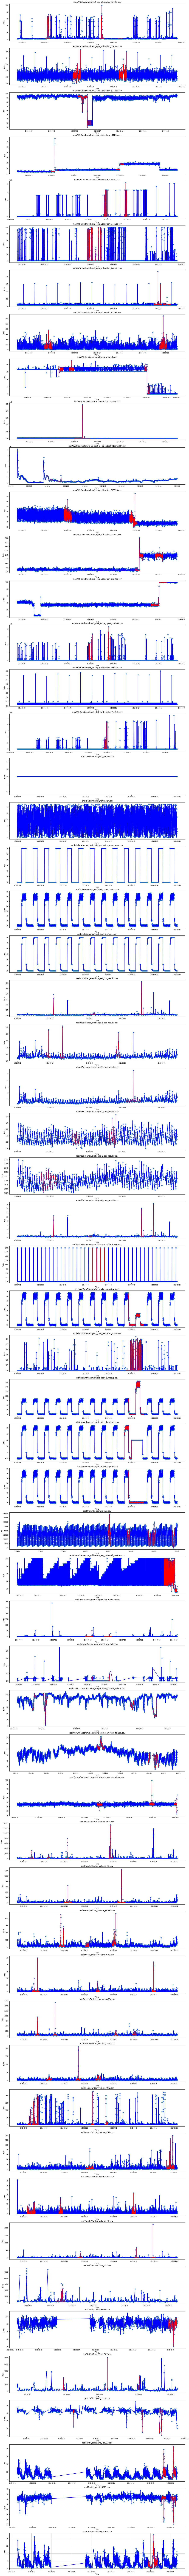

In [33]:
fig = plt.figure(figsize=(20, 300))

num = 0
for key1 in data:
    for key2 in data[key1]:
        num += 1
        y = data[key1][key2]['value']
        x = pd.to_datetime(data[key1][key2]['timestamp'])
        
        ax = fig.add_subplot(csvs_num,1,num)
        
        ax.title.set_text(key1+'/'+key2)
        ax.set_xlabel('Time')
        ax.set_ylabel('Data')
        plt.setp(ax.get_xticklabels(), size=8)
        ax.plot(x, y, 'b-', linewidth=2)
        i = 0
        while data[key1][key2]['interval'][i] != 0:
            bold = data[key1][key2]['interval'][i]
            ax.plot(x[bold], y[bold], 'r-', linewidth=1)
            i += 1
        ax.scatter(x, y)

plt.grid()
plt.show()
